<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/Chapter_2_%E1%84%82%E1%85%B2%E1%84%8B%E1%85%AD%E1%86%A8%E1%84%8B%E1%85%A6%E1%84%89%E1%85%A5_%E1%84%87%E1%85%A1%E1%86%BC%E1%84%8B%E1%85%B5_%E1%84%83%E1%85%AE%E1%86%AF_%E1%84%84%E1%85%A1%E1%86%AF%E1%84%85%E1%85%B5%E1%86%AB_%E1%84%8C%E1%85%B5%E1%86%B8%E1%84%8B%E1%85%B3%E1%86%AF_%E1%84%8B%E1%85%A6%E1%84%8B%E1%85%A5%E1%84%87%E1%85%B5%E1%84%8B%E1%85%A6%E1%86%AB%E1%84%87%E1%85%B5%E1%84%8B%E1%85%A6_%E1%84%82%E1%85%A2%E1%84%82%E1%85%A9%E1%87%82%E1%84%8B%E1%85%B3%E1%84%85%E1%85%A7_%E1%84%92%E1%85%A1%E1%86%AB%E1%84%83%E1%85%A1%2C_%E1%84%8B%E1%85%B5_%E1%84%84%E1%85%A2_%E1%84%8C%E1%85%A5%E1%86%A8%E1%84%83%E1%85%A1%E1%86%BC%E1%84%92%E1%85%A1%E1%86%AB_%E1%84%89%E1%85%AE%E1%86%A8%E1%84%87%E1%85%A1%E1%86%A8%E1%84%85%E1%85%AD%E1%84%85%E1%85%B3%E1%86%AF_%E1%84%80%E1%85%AE%E1%84%92%E1%85%A1%E1%84%89%E1%85%B5%E1%84%8B%E1%85%A9(%EC%97%B0%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다. 이 때 적당한 숙박료를 구하시오. (5점)
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 New York City Airbnb Open Data를 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    AB_NYC_2019.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수

    
- 데이터 출처: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. Regression에 대하여

### 선형 회귀에 대하여

### 그 외의 회귀 방법


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기

os.environ ['KAGGLE_USERNAME'] = 'pseudoexaminee'
os.environ ['KAGGLE_KEY'] = '50ef5cd85c486772c23beb302ab99e32'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data
!unzip '*.zip'

  0% 0.00/2.44M [00:00<?, ?B/s]
100% 2.44M/2.44M [00:00<00:00, 82.0MB/s]
Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [137]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [138]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [139]:
df.drop(['id', 'name', 'host_id', 'host_name','latitude','longitude'],
        axis=1, inplace=True)

In [140]:
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   last_review                     38843 non-null  object 
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.7+ MB


In [142]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [143]:
df[df['price']==0]

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,2018-01-06,0.05,4,28
25433,Bronx,East Morrisania,Private room,0,2,55,2019-06-24,2.56,4,127
25634,Brooklyn,Bushwick,Private room,0,2,16,2019-05-18,0.71,5,0
25753,Brooklyn,Greenpoint,Private room,0,2,12,2017-10-27,0.53,2,0
25778,Brooklyn,Williamsburg,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,Brooklyn,Bedford-Stuyvesant,Private room,0,1,93,2019-06-15,4.28,6,176
25795,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,2019-06-21,4.37,6,232
25796,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,2019-06-23,4.35,6,222
26259,Manhattan,Murray Hill,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,Brooklyn,Bushwick,Shared room,0,30,2,2019-06-22,0.11,6,333


In [144]:
df[df['availability_365']==0]

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,Brooklyn,Bedford-Stuyvesant,Private room,60,45,49,2017-10-05,0.40,1,0
8,Manhattan,Upper West Side,Private room,79,2,118,2017-07-21,0.99,1,0
14,Manhattan,West Village,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,Brooklyn,Williamsburg,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
...,...,...,...,...,...,...,...,...,...,...
48550,Queens,Ridgewood,Private room,45,1,0,NaN,NaN,1,0
48731,Brooklyn,Park Slope,Entire home/apt,111,8,0,NaN,NaN,1,0
48756,Manhattan,Murray Hill,Entire home/apt,129,2,0,NaN,NaN,1,0
48760,Queens,Sunnyside,Private room,46,1,0,NaN,NaN,1,0


In [145]:
df['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

### 문제 5. 수치형 데이터와 Price의 Jointplot 분석하기


In [146]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


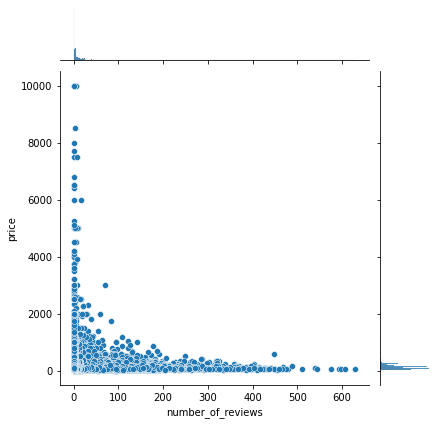

In [147]:
sns.jointplot(data=df, y='price', x='number_of_reviews')

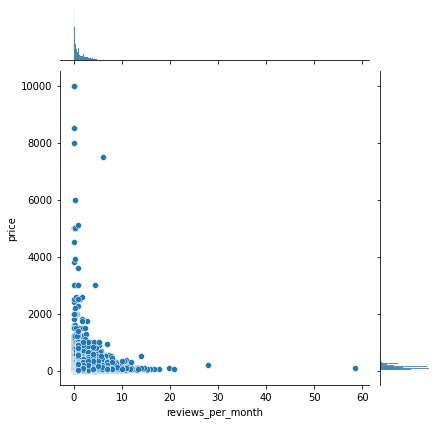

In [148]:
sns.jointplot(data=df, y='price', x='reviews_per_month')

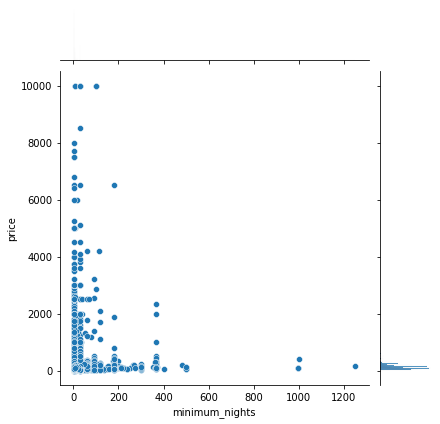

In [149]:
sns.jointplot(data=df, y='price', x='minimum_nights')

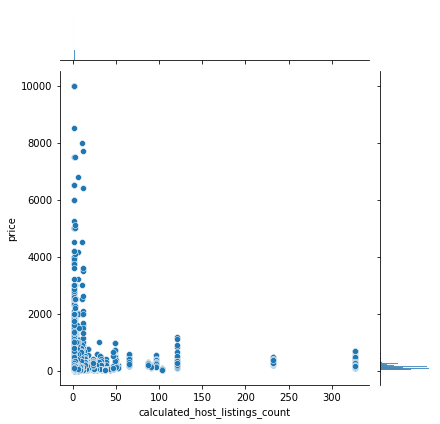

In [150]:
sns.jointplot(data=df, y='price', x='calculated_host_listings_count')

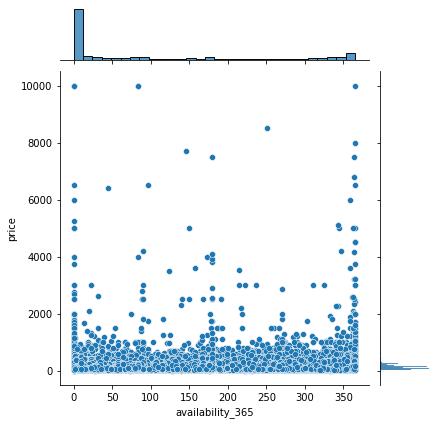

In [151]:
sns.jointplot(data=df, y='price', x='availability_365')

### 문제 6. 수치형 데이터와 Price의 상관성 분석하기

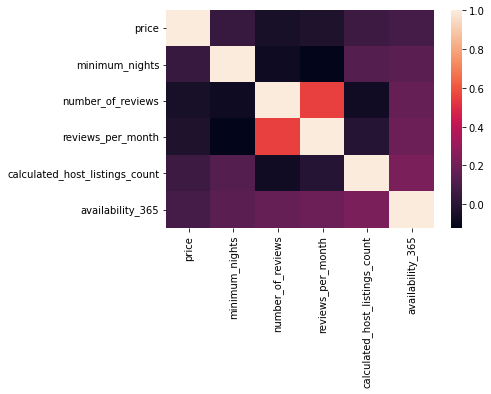

In [152]:
sns.heatmap(df.corr())

### 문제 7. 범주형 데이터와 Price의 Boxplot 계열 및 Histogram 분석하기

In [153]:
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   last_review                     38843 non-null  object 
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.7+ MB


{'boxes': [<matplotlib.lines.Line2D at 0x7f867c0b5450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f867c0b14d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f867c0ad510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f867c0b1f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f867c0b5a10>,
  <matplotlib.lines.Line2D at 0x7f867c0b5f50>]}

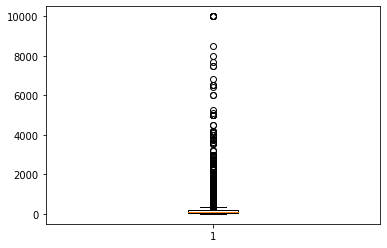

In [155]:
plt.boxplot(data=df, x='price')

(array([4.8785e+04, 7.5000e+01, 1.7000e+01, 1.0000e+01, 8.0000e+00]),
 array([    0.,  2000.,  4000.,  6000.,  8000., 10000.]),
 <a list of 5 Patch objects>)

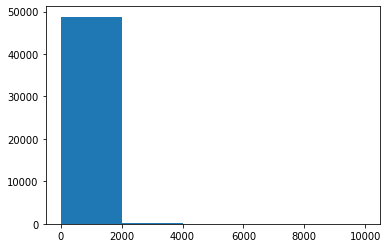

In [156]:
plt.hist(data=df, x='price', bins=5)

## Step 3. 데이터 클리닝 수행하기

### 문제 8. 미기입, 오기입 데이터 확인하기

In [157]:
# 각 컬럼을 분석하여 미기입/오기입된 데이터 확인하기
# Hint) 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts()등으로 확인

df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [158]:
df = df.dropna()

In [159]:
df[df['price'] == 0].index

Int64Index([23161, 25433, 25634, 25753, 25778, 25794, 25795, 25796, 26841,
            26866],
           dtype='int64')

In [160]:
df.drop([23161, 25433, 25634, 25753, 25778, 25794, 25795, 25796, 26841,
            26866], axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [161]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38833.000000,38833.000000,38833.000000,38833.000000,38833.000000,38833.000000
mean,142.354595,5.867561,29.295393,1.373128,5.164602,114.878222
std,196.957737,17.386070,48.188127,1.680391,26.299034,129.549091
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 문제 9. 아웃라이어를 제거하고 통계 재분석하기

In [162]:
# quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기

p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.01)
print(p1, p2)

df= df[((df['price'] < p1) & (df['price'] > p2))]

671.3600000000006 30.0


In [163]:
p1 = df['minimum_nights'].quantile(0.99)
p2 = df['minimum_nights'].quantile(0.01)
print(p1, p2)

df= df[((df['minimum_nights'] < p1) & (df['minimum_nights'] > p2))]

31.0 1.0


In [164]:
p1 = df['number_of_reviews'].quantile(0.99)
p2 = df['number_of_reviews'].quantile(0.01)
print(p1, p2)

df = df[((df['number_of_reviews'] < p1) & (df['number_of_reviews'] > p2))]

207.0 1.0


In [165]:
p1 = df['reviews_per_month'].quantile(0.99)
p2 = df['reviews_per_month'].quantile(0.01)
print(p1, p2)

df = df[((df['reviews_per_month'] < p1) & (df['reviews_per_month'] > p2))]

5.42 0.04


In [166]:
p1 = df['calculated_host_listings_count'].quantile(0.99)
p2 = df['calculated_host_listings_count'].quantile(0.01)
print(p1, p2)

df = df[((df['calculated_host_listings_count'] < p1) & (df['calculated_host_listings_count'] > p2))]

96.0 1.0


In [167]:
p1 = df['availability_365'].quantile(0.99)
p2 = df['availability_365'].quantile(0.01)
print(p1, p2)

df = df[((df['availability_365'] < p1) & (df['availability_365'] > p2))]

365.0 0.0


### 문제 10. 미기입 데이터 처리하기

In [168]:
# fill(), dropna() 등으로 미기입된 데이터를 처리하기
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5912 entries, 12 to 47911
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             5912 non-null   object 
 1   neighbourhood                   5912 non-null   object 
 2   room_type                       5912 non-null   object 
 3   price                           5912 non-null   int64  
 4   minimum_nights                  5912 non-null   int64  
 5   number_of_reviews               5912 non-null   int64  
 6   last_review                     5912 non-null   object 
 7   reviews_per_month               5912 non-null   float64
 8   calculated_host_listings_count  5912 non-null   int64  
 9   availability_365                5912 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 508.1+ KB


## Step 4. 모델 학습을 위한 데이터 전처리 

In [169]:
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12,Brooklyn,South Slope,Private room,89,4,167,2019-06-24,1.34,3,314
21,Brooklyn,Park Slope,Private room,130,2,130,2019-07-01,1.09,6,347
23,Brooklyn,Park Slope,Private room,110,2,71,2019-07-02,0.61,6,304
24,Brooklyn,Bedford-Stuyvesant,Entire home/apt,120,2,88,2019-06-19,0.73,2,233
28,Manhattan,Inwood,Private room,44,3,108,2019-06-15,1.11,3,311


### 문제 11. get_dummies를 이용한 범주형 데이터 전처리

In [173]:
X_cat = df.drop(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], axis=1)
X_cat = pd.get_dummies(X_cat)

### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [171]:
from sklearn.preprocessing import StandardScaler

In [174]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
X_num = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [175]:
from sklearn.model_selection import train_test_split

In [176]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [177]:
from xgboost import XGBRegressor

In [179]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()

model_reg.fit(X_train, y_train)


[05:53:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 15. 모델 학습 결과 평가하기

In [181]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [182]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test,pred))
print(sqrt(mean_squared_error(y_test,pred)))




0.22229779532689523
0.5313269057566802


## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


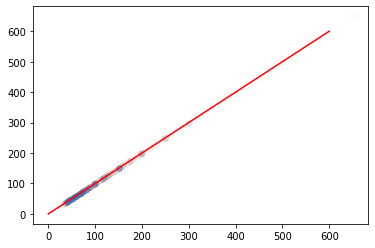

In [184]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기

plt.scatter(x=y_test, y=pred, alpha=0.005)
plt.plot([0,600], [0,600], 'r-')




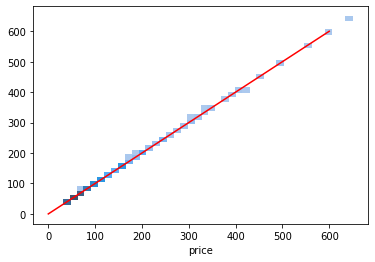

In [185]:
sns.histplot(x=y_test, y=pred)
plt.plot([0,600], [0, 600], 'r-')

### 문제 17. 에러 값의 히스토그램 확인하기


Text(0.5, 0, 'error (%)')

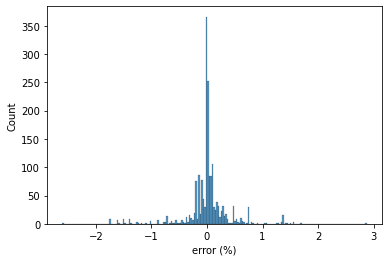

In [186]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test)/y_test * 100
sns.histplot(err)
plt.xlabel('error (%)')
